![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(a, b):
    return np.allclose(a, b, rtol=1e-12, atol=1e-12)

# Parte 1: Calculando raízes com a segunda derivada

Vimos, em aula, que o Método de Newton usa a primeira derivada da função $f$
para calcular uma aproximação linear da função, e sucessivamente se aproximar do mínimo.

Nesta parte, iremos usar a segunda derivada também.

## Questão 1: Fórmulas

Sejam dados
$$\begin{align*}
  f(x_0) & = v_0 \\
 f'(x_0) & = v_1 \\
f''(x_0) & = v_2
\end{align*}$$

Dê, em função de $x_0$, $v_0$, $v_1$ e $v_2$, as raizes da parábola correspondente.
Em particular, mostre que as raízes (se existirem) são da forma $x_0 + \text{passo}$.

Bom, se $x_0$ está proximo da raiz, então pelo metodo de newtown:
<img src="newton.png">
sabemos que a reta tangente ao ponto aproxima a função ao valor da sua raiz, logo se existe uma raiz proxima de $x_0$, o passo do metodo de newton nos aproxima de seu valor
Logo se a raiz proxima de $x_0$ existir ela é da forma $v_0-v_0/v_1$

Qual raiz você escolheria?  Porquê?

## Questão 2: O passo

Escreva a função `step(v0, v1, v2)` que dá o passo a ser feito.

Se a parábola não possuir raiz, use, simplesmente, a regra original do método de Newton.

In [3]:
def step2(v0, v1, v2):
    return v0-((v2/v0)/v1)

In [4]:
assert step2(1, 2, 2) == -1

AssertionError: 

In [ ]:
assert step2(1, 1, 1) == -1

In [ ]:
assert np.isclose(step2(-1, 1, 0.2), 0.9160797831)

In [ ]:
# Um teste mais difícil, não se preocupe muito se não passar
assert np.isclose(step2(-1,  1, -0.2), 1.1270166538)
assert np.isclose(step2( 1, -1,  0.2), 1.1270166538)

Explique porque os passos dos dois `assert`s da última caixa devem ser iguais.

YOUR ANSWER HERE

## Questão 3: Newton

Dê, abaixo, o método de Newton, e também o método de "Newton com segunda derivada",
retornando a lista de todos os pontos visitados a partir de `x0`, inclusive.

O critério de parada será, para os dois, quando o tamanho do passo, _relativo ao ponto atual_,
for menor do que a precisão indicada por `reltol`.
(mas agora que você já calculou o passo, use-o, não custa quase nada!)

In [ ]:
def newton(f, df, x0, maxsteps=100, reltol=1e-12):
    l=[x0]
    for i in range(maxsteps):
        passo = f(x0)/df(x0)
        newx= x-passo
        if abs((F(newx-x0)/x0)) < reltol:
            return l
        l.append(newx)
        x0=newx
    return l

def newton2(f, df, ddf, x0, maxsteps=100, reltol=1e-12):
    

In [ ]:
xs_newton = newton(lambda x: np.exp(x) - 10, np.exp, 1)

assert len(xs_newton) == 9
assert veryclose(np.exp(xs_newton[-1]), 10)

In [ ]:
xs_newton2 = newton2(lambda x: np.exp(x) - 10, np.exp, np.exp, 1, maxsteps=10)

assert len(xs_newton2) == 6
assert veryclose(np.exp(xs_newton2[-1]), 10)

Faça, agora, o gráfico do erro para cada um dos métodos ao calcular uma raiz de $e^x = 10$:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

Este resultado é esperado? Comente

YOUR ANSWER HERE

Ambos os métodos fizeram uma iteração que "não saiu do lugar".
Explique porque eles não pararam na iteração anterior.

YOUR ANSWER HERE

## Questão 4: Uma outra função

Use ambos os métodos para encontrar uma raiz de $xe^x = 10$.

Dê, abaixo, as funções auxiliares:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Agora, calcule os pontos gerados por ambos os métodos, começando a partir de $x_0 = 1$:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Faça o gráfico do erro "em $y$", ou seja, o quanto a equação está errada (já que não temos a solução analítica).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

Comente, novamente, os resultados, indicando eventuais semelhanças e diferenças com o caso anterior.

YOUR ANSWER HERE

# Parte 2: Calculando integrais

Dê, abaixo, os métodos do retângulo, trapézio e ponto médio.

In [5]:
def rectangle(f, a, b, n=100):
    xs, h = np.linspace(a, b, num=n, endpoint=False, retstep = True)
    return np.sum(f(xs))*h
def trap(f, a, b, n=100):
    ints = []
    xs = np.linspace(a, b, num=n, endpoint=False)
    d = (b-a)/n
    ints = (f(xs) + f(xs+d))/2*d
    return np.sum(ints)
def midpoint(f, a, b, n=100):
    l, h = np.linspace(a,b, num=n, endpoint=False, retstep=True)
    if n == 1:
        h = abs(b-a)
    mids = l + h/2
    return np.sum(f(mids)*h)

methods = [rectangle, trap, midpoint]

In [6]:
assert not np.isclose(rectangle(np.sin, 0, 1), 1 - np.cos(1))

In [7]:
assert np.isclose(trap(np.sin, 0, 1), 1 - np.cos(1))

In [8]:
assert np.isclose(midpoint(np.sin, 0, 1), 1 - np.cos(1))

## Questão 5: Integrando o cosseno

Faça o gráfico do erro de integração da função cosseno, no intervalo $[0, 2\pi]$,
para $n$ indo de $1$ até $30$,
para cada um dos métodos.

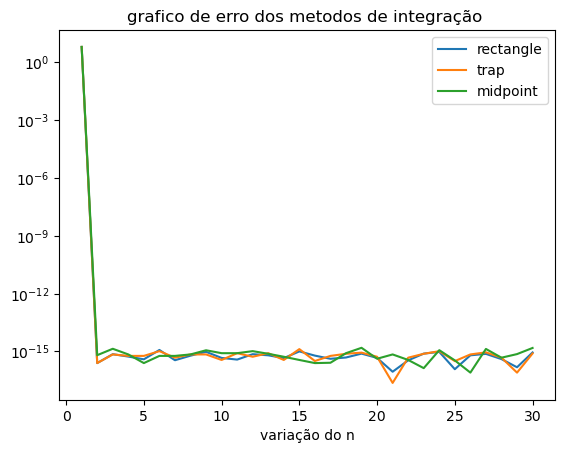

In [9]:
ns = range(1,30+1)
def f(x):
    return np.cos(x)
def F(x):
    return -np.sin(x)
ans=F(2*np.pi)-F(0)
for m in methods:
    valores = np.array([m(f,0,2*np.pi,n) for n in ns])
    plt.semilogy(ns,abs(ans-valores),label=m.__name__)
plt.title("grafico de erro dos metodos de integração ")
plt.legend()
plt.xlabel('variação do n')
ax = plt.gca()

In [10]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

O que você percebe neste gráfico?  Como você explica?

Temos um erro bem pequeno e quase constante para n>2, para todas as 3 formas de integração

Repita para o intervalo $[0, \pi]$.
Agora, faça cada método em uma figura separada:

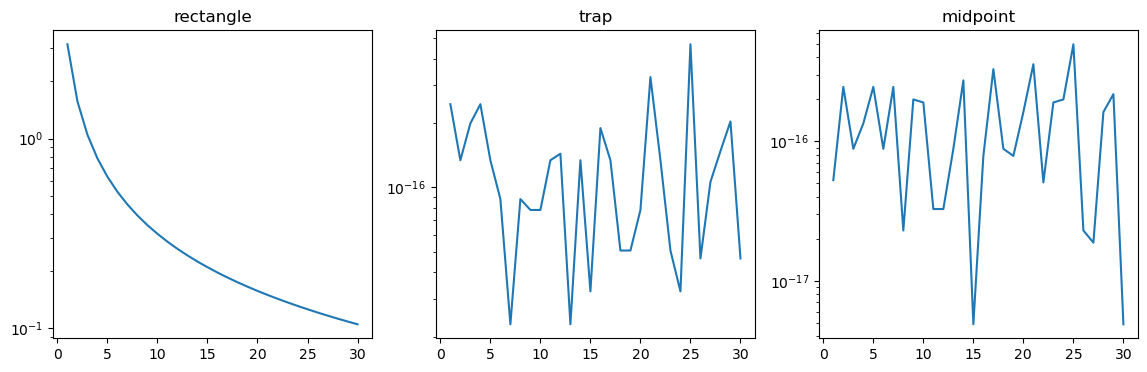

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(14,4))
for m,ax in zip(methods,axs):
    valores = np.array([m(f,0,np.pi,n) for n in ns])
    ax.semilogy(ns,abs(valores-ans))
    ax.set_title(m.__name__)

In [12]:
for ax in axs:
    assert len(ax.lines) == 1
    assert len(ax.get_title()) >= 1

Comente as semelhanças e diferenças do caso anterior.

o metodo do retangulo é falho para esse intervalo. porém o metodo do trazio e midpoint são uma boa aproximação para a integral pois possuem erros muito pequenos

Qual a velocidade de convergência de cada um dos métodos para a integral no intervalo $[0, \pi]$?

## Questão 6: Uma outra função

Calcule a integral de $\frac{1}{2 + \cos(x)}$ no intervalo $[0, 2\pi]$, com cada um dos métodos,
e faça novamente o gráfico do erro em função do número de subdivisões.

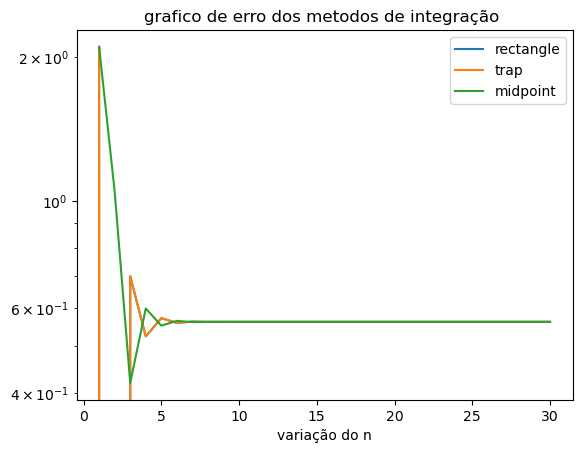

In [17]:
ns = range(1,30+1)
def g(x):
    return 1/(2+np.cos(x))
def G(x):
    return (2/(3**1/2))*np.arctan(np.tan(x/2)*(3**1/2))
ans1=(2*np.pi)/(3**1/2)
for m in methods:
    valores = np.array([m(g,0,2*np.pi,n) for n in ns])
    plt.semilogy(ns,abs(ans1-valores),label=m.__name__)
plt.title("grafico de erro dos metodos de integração ")
plt.legend()
plt.xlabel('variação do n')
ax = plt.gca()

In [18]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

* Qual a velocidade de convergência de cada um dos métodos?
* Qual método parece ser mais rápido?

YOUR ANSWER HERE

Agora, repita para o intervalo $[0, \pi/2]$.

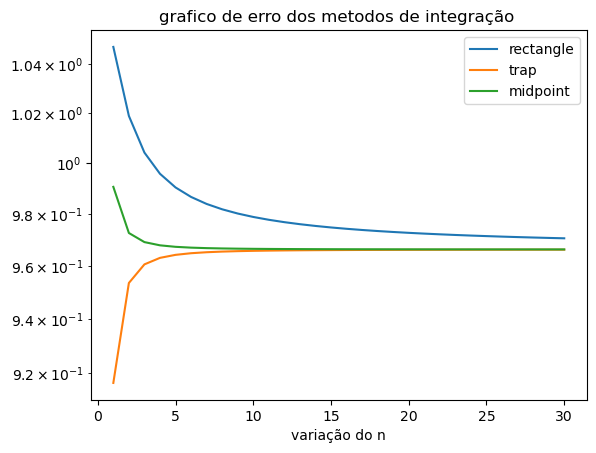

In [20]:
ans2=np.pi/3*(3**1/2)
for m in methods:
    valores = np.array([m(g,0,np.pi/2,n) for n in ns])
    plt.semilogy(ns,abs(ans2-valores),label=m.__name__)
plt.title("grafico de erro dos metodos de integração ")
plt.legend()
plt.xlabel('variação do n')
ax = plt.gca()

Compare com os resultados para a integral no intervalo $[0, 2\pi]$.

a integral de $[0, \pi/2]$ converge de forma mais suave do que a de $[0, 2\pi]$

## Questão 7: E mais uma

$$\int_0^{2\pi} \frac{dx}{1 + 2\cos^2(x)}$$

In [ ]:
def g1(x):
    return 1/(1+(2*np.cos(x)*np.cos(x)))
def G1(x):
    return (1/(6**1/2))*np.arctan(((2/3)**1/2)*np.tan(x))
ax = plt.gca()
ans2=G1(np.pi*2)-G1(0)
for m in methods:
    valores = np.array([m(g1,0,np.pi*2,n) for n in ns])
    plt.semilogy(ns,abs(ans2-valores),label=m.__name__)
plt.title("grafico de erro dos metodos de integração ")
plt.legend()
plt.xlabel('variação do n')

In [ ]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) > 5

Compare com o que você obteve para a função $\frac{1}{1 + 2 \cos(x)}$:
- O que você percebe de semelhante?
- O que há de diferente?
- Como você explica as diferenças e similaridades?

(contando que minha integral do wolfram está errada) como são graficos "semelhantes" os metodos pro calculo da integral possuem um erro de ordem semelhantes

## Questão 8: A última

Calcule

$$\int_0^{2\pi} \frac{\sin(1999x)}{\sin(x)}$$

pelo método do ponto médio, variando o número de subdivisões entre $2$ e $2000$ como abaixo,
e faça o gráfico do **valor da integral** ao variar $n$.

In [ ]:
ns = range(2,2000,2)

# YOUR CODE HERE
raise NotImplementedError()

O que você vê no gráfico?

YOUR ANSWER HERE

Explique porque usar o método do ponto médio, e porque usar um número par de subdivisões.

YOUR ANSWER HERE

### Bônus

Como você faria para ter certeza do valor correto da integral?
Explique suas ideias abaixo, e faça contas, se desejar, na caixa seguinte.

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()